In [1]:
%pip install kaggle
%pip install opendatasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=c3ca4f3f16596df7a65ae58a0ff6a500efd020dc3f3173ddb625834a203de984
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\9f\af\22\bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opendatasets pandas matplotlib numpy tensorflow


  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl (385.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import opendatasets as od
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout



In [3]:
# Solo correr una vez

import os
import pandas as pd
from PIL import Image
import numpy as np

# Ruta a los directorios de imágenes
base_dir = "PolyMNIST/MMNIST"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

def load_images_from_folder(folder):
    images = []
    labels = []
    for modality in range(5):  # Para cada modalidad de m0 a m4
        modality_dir = os.path.join(folder, f"m{modality}")
        for filename in os.listdir(modality_dir):
            if filename.endswith(".png"):
                try:
                    # Cargar la imagen
                    img_path = os.path.join(modality_dir, filename)
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    
                    # Extraer la etiqueta del nombre del archivo
                    label = filename.split('.')[1]  # Por ejemplo: 1.2.png -> 2
                    
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error al cargar {filename}: {e}")
    return np.array(images), np.array(labels)

# Cargar las imágenes de entrenamiento y prueba
train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)

# # Convertir a DataFrame para una visualización más fácil
# train_df = pd.DataFrame({'image': list(train_images), 'label': train_labels})
# test_df = pd.DataFrame({'image': list(test_images), 'label': test_labels})

# print(train_df.head())


In [4]:
## Solo correr una vez
import pickle

# Guardar los datos de entrenamiento
with open('train_data.pkl', 'wb') as f:
    pickle.dump((train_images, train_labels), f)

# Guardar los datos de prueba
with open('test_data.pkl', 'wb') as f:
    pickle.dump((test_images, test_labels), f)


In [ ]:
# Cargar los datos de entrenamiento
with open('train_data.pkl', 'rb') as f:
    train_images, train_labels = pickle.load(f)

# Cargar los datos de prueba
with open('test_data.pkl', 'rb') as f:
    test_images, test_labels = pickle.load(f)


In [5]:

print("Forma de train_images:", train_images.shape)
print("Forma de train_labels:", train_labels.shape)
print("Forma de test_images:", test_images.shape)
print("Forma de test_labels:", test_labels.shape)

# Verificar el tipo de datos y el rango de valores
print("Tipo de datos de train_images:", train_images.dtype)
print("Rango de valores en train_images:", train_images.min(), "-", train_images.max())

# Mostrar la primera imagen (asumiendo que es una imagen RGB)
print("Primera imagen:")
print(train_images[0])


Forma de train_images: (300000, 28, 28, 3)
Forma de train_labels: (300000,)
Forma de test_images: (50000, 28, 28, 3)
Forma de test_labels: (50000,)
Tipo de datos de train_images: uint8
Rango de valores en train_images: 0 - 255
Primera imagen:
[[[202 208 234]
  [202 208 234]
  [200 207 233]
  ...
  [184 194 230]
  [182 195 230]
  [181 195 232]]

 [[202 209 235]
  [200 207 233]
  [197 204 230]
  ...
  [182 195 230]
  [181 193 231]
  [180 194 231]]

 [[198 205 231]
  [198 205 231]
  [196 206 233]
  ...
  [178 190 228]
  [176 188 228]
  [174 188 227]]

 ...

 [[218 222 233]
  [218 222 233]
  [218 222 233]
  ...
  [211 217 229]
  [210 216 228]
  [211 217 229]]

 [[218 222 233]
  [218 222 234]
  [218 222 234]
  ...
  [214 217 232]
  [214 217 232]
  [213 216 231]]

 [[218 222 233]
  [218 222 234]
  [218 222 234]
  ...
  [215 219 231]
  [214 218 230]
  [213 217 229]]]


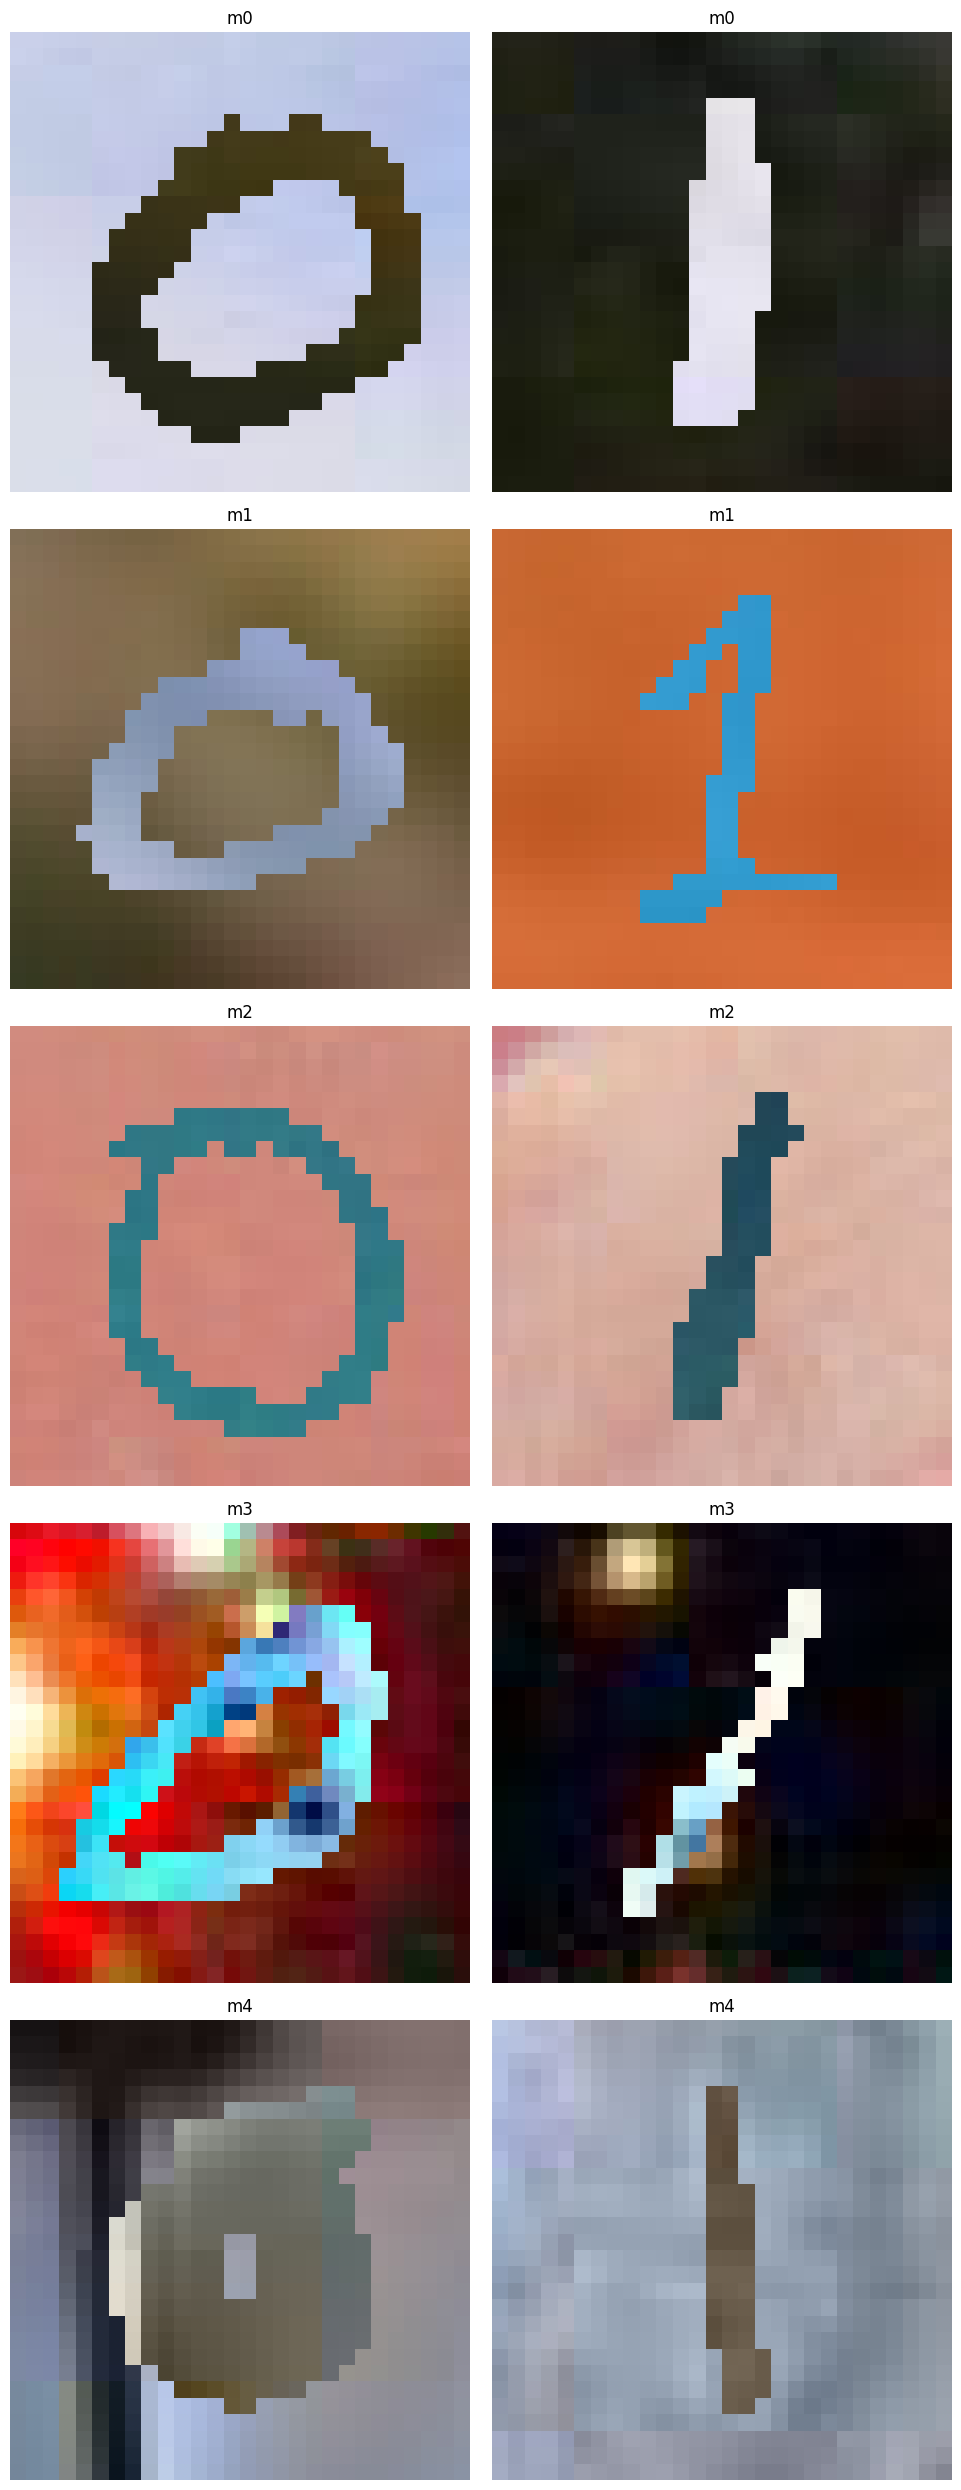

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ruta a los directorios de imágenes
base_dir = "PolyMNIST/MMNIST"
train_dir = os.path.join(base_dir, "train")

def load_example_images(folder, modalities=[0, 1, 2, 3, 4], num_examples=2):
    images = {}
    for modality in modalities:
        modality_dir = os.path.join(folder, f"m{modality}")
        modality_images = []
        for filename in os.listdir(modality_dir):
            if filename.endswith(".png"):
                if len(modality_images) < num_examples:
                    img_path = os.path.join(modality_dir, filename)
                    img = Image.open(img_path)
                    modality_images.append(img)
                else:
                    break
        images[modality] = modality_images
    return images

# Cargar una o dos imágenes de cada modalidad
example_images = load_example_images(train_dir, num_examples=2)

def plot_example_images(example_images):
    num_modalities = len(example_images)
    num_examples = len(next(iter(example_images.values())))
    
    plt.figure(figsize=(10, 5 * num_modalities))
    
    for modality, imgs in example_images.items():
        for i, img in enumerate(imgs):
            plt.subplot(num_modalities, num_examples, modality * num_examples + i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"m{modality}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar una o dos imágenes de cada modalidad
plot_example_images(example_images)


In [12]:
def get_image_resolution(images):
    if len(images) > 0:
        # Asumiendo que todas las imágenes tienen la misma resolución
        return images[0].shape
    return None

# Obtener la resolución de las imágenes
train_resolution = get_image_resolution(train_images)
test_resolution = get_image_resolution(test_images)

print(f"Resolución de las imágenes en el conjunto de entrenamiento: {train_resolution}")
print(f"Resolución de las imágenes en el conjunto de prueba: {test_resolution}")


Resolución de las imágenes en el conjunto de entrenamiento: (28, 28, 3)
Resolución de las imágenes en el conjunto de prueba: (28, 28, 3)


In [13]:
def count_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique, counts))

# Contar las etiquetas en los conjuntos de entrenamiento y prueba
train_label_counts = count_labels(train_labels)
test_label_counts = count_labels(test_labels)

print("Número de imágenes por etiqueta en el conjunto de entrenamiento:")
for label, count in train_label_counts.items():
    print(f"Etiqueta {label}: {count}")

print("\nNúmero de imágenes por etiqueta en el conjunto de prueba:")
for label, count in test_label_counts.items():
    print(f"Etiqueta {label}: {count}")

# Convertir los resultados a DataFrames para una visualización más clara
train_counts_df = pd.DataFrame(list(train_label_counts.items()), columns=['Etiqueta', 'Número de Imágenes'])
test_counts_df = pd.DataFrame(list(test_label_counts.items()), columns=['Etiqueta', 'Número de Imágenes'])

print("\nDistribución en el conjunto de entrenamiento:")
print(train_counts_df)

print("\nDistribución en el conjunto de prueba:")
print(test_counts_df)


Número de imágenes por etiqueta en el conjunto de entrenamiento:
Etiqueta 0: 50
Etiqueta 1: 50
Etiqueta 10: 50
Etiqueta 100: 50
Etiqueta 1000: 50
Etiqueta 1001: 50
Etiqueta 1002: 50
Etiqueta 1003: 50
Etiqueta 1004: 50
Etiqueta 1005: 50
Etiqueta 1006: 50
Etiqueta 1007: 50
Etiqueta 1008: 50
Etiqueta 1009: 50
Etiqueta 101: 50
Etiqueta 1010: 50
Etiqueta 1011: 50
Etiqueta 1012: 50
Etiqueta 1013: 50
Etiqueta 1014: 50
Etiqueta 1015: 50
Etiqueta 1016: 50
Etiqueta 1017: 50
Etiqueta 1018: 50
Etiqueta 1019: 50
Etiqueta 102: 50
Etiqueta 1020: 50
Etiqueta 1021: 50
Etiqueta 1022: 50
Etiqueta 1023: 50
Etiqueta 1024: 50
Etiqueta 1025: 50
Etiqueta 1026: 50
Etiqueta 1027: 50
Etiqueta 1028: 50
Etiqueta 1029: 50
Etiqueta 103: 50
Etiqueta 1030: 50
Etiqueta 1031: 50
Etiqueta 1032: 50
Etiqueta 1033: 50
Etiqueta 1034: 50
Etiqueta 1035: 50
Etiqueta 1036: 50
Etiqueta 1037: 50
Etiqueta 1038: 50
Etiqueta 1039: 50
Etiqueta 104: 50
Etiqueta 1040: 50
Etiqueta 1041: 50
Etiqueta 1042: 50
Etiqueta 1043: 50
Etiqueta 104

In [16]:
import matplotlib.pyplot as plt

def check_balance(label_counts):
    total_images = sum(label_counts.values())
    num_classes = len(label_counts)
    balanced = True
    threshold = 0.2  # Umbral de desequilibrio permitido

    print(f"Total de imágenes: {total_images}")
    print(f"Número de clases: {num_classes}")
    
    for label, count in label_counts.items():
        proportion = count / total_images
        print(f"Etiqueta {label}: {count} imágenes ({proportion:.2%})")
        # Verificar si la clase tiene menos del umbral de desequilibrio permitido
        if proportion < 1 / num_classes - threshold or proportion > 1 / num_classes + threshold:
            balanced = False
    
    return balanced

# Verificar el balanceo en el conjunto de entrenamiento y prueba
train_balance = check_balance(train_label_counts)
test_balance = check_balance(test_label_counts)

if train_balance:
    print("\nEl conjunto de entrenamiento está balanceado.")
else:
    print("\nEl conjunto de entrenamiento NO está balanceado.")

if test_balance:
    print("\nEl conjunto de prueba está balanceado.")
else:
    print("\nEl conjunto de prueba NO está balanceado.")


Total de imágenes: 300000
Número de clases: 6742
Etiqueta 0: 50 imágenes (0.02%)
Etiqueta 1: 50 imágenes (0.02%)
Etiqueta 10: 50 imágenes (0.02%)
Etiqueta 100: 50 imágenes (0.02%)
Etiqueta 1000: 50 imágenes (0.02%)
Etiqueta 1001: 50 imágenes (0.02%)
Etiqueta 1002: 50 imágenes (0.02%)
Etiqueta 1003: 50 imágenes (0.02%)
Etiqueta 1004: 50 imágenes (0.02%)
Etiqueta 1005: 50 imágenes (0.02%)
Etiqueta 1006: 50 imágenes (0.02%)
Etiqueta 1007: 50 imágenes (0.02%)
Etiqueta 1008: 50 imágenes (0.02%)
Etiqueta 1009: 50 imágenes (0.02%)
Etiqueta 101: 50 imágenes (0.02%)
Etiqueta 1010: 50 imágenes (0.02%)
Etiqueta 1011: 50 imágenes (0.02%)
Etiqueta 1012: 50 imágenes (0.02%)
Etiqueta 1013: 50 imágenes (0.02%)
Etiqueta 1014: 50 imágenes (0.02%)
Etiqueta 1015: 50 imágenes (0.02%)
Etiqueta 1016: 50 imágenes (0.02%)
Etiqueta 1017: 50 imágenes (0.02%)
Etiqueta 1018: 50 imágenes (0.02%)
Etiqueta 1019: 50 imágenes (0.02%)
Etiqueta 102: 50 imágenes (0.02%)
Etiqueta 1020: 50 imágenes (0.02%)
Etiqueta 1021: 50

### Parte 3

In [6]:
def preprocess_data(images, labels):
    images = images.astype('float32') / 255.0
    labels = to_categorical(labels, num_classes=10)
    images = images.reshape(images.shape[0], 28, 28, 3)
    return images, labels


# Process the training data
X_train, y_train = preprocess_data(train_images, train_labels)

# Process the test data
X_test, y_test = preprocess_data(test_images, test_labels)


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((300000, 28, 28, 3), (300000, 10), (50000, 28, 28, 3), (50000, 10))

In [19]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()



C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     1,204,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,472,522 (5.62 MB)

 Trainable params: 1,472,522 (5.62 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:

def create_mlp_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 3)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mlp_model = create_mlp_model()
mlp_model.summary()

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,204,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,472,522 (5.62 MB)

 Trainable params: 1,472,522 (5.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Por motivos de tiempo, vamos a reducir el tamaño del conjunto de datos

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
X_test_small, _, y_test_small, _ = train_test_split(X_test, y_test, test_size=0.1, random_state=42)


In [8]:
X_train_small.shape, y_train_small.shape, X_test_small.shape, y_test_small.shape 

((30000, 28, 28, 3), (30000, 10), (45000, 28, 28, 3), (45000, 10))

In [9]:
def plot_model_history(history, model_name):
    # Plot loss
    plt.figure(figsize=(14, 5))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [48]:
#cnn_history_big = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)
mlp_history_big = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)


Epoch 1/20
2344/2344 - 24s - 10ms/step - accuracy: 0.4526 - loss: 1.5371 - val_accuracy: 0.6002 - val_loss: 1.2384
Epoch 2/20
2344/2344 - 26s - 11ms/step - accuracy: 0.5678 - loss: 1.2366 - val_accuracy: 0.6964 - val_loss: 1.0591
Epoch 3/20
2344/2344 - 27s - 11ms/step - accuracy: 0.6187 - loss: 1.1078 - val_accuracy: 0.7288 - val_loss: 0.9852
Epoch 4/20
2344/2344 - 28s - 12ms/step - accuracy: 0.6549 - loss: 1.0175 - val_accuracy: 0.7297 - val_loss: 1.0008
Epoch 5/20
2344/2344 - 28s - 12ms/step - accuracy: 0.6770 - loss: 0.9670 - val_accuracy: 0.7646 - val_loss: 0.9199
Epoch 6/20
2344/2344 - 28s - 12ms/step - accuracy: 0.6912 - loss: 0.9261 - val_accuracy: 0.7775 - val_loss: 0.8875
Epoch 7/20
2344/2344 - 27s - 11ms/step - accuracy: 0.7041 - loss: 0.8919 - val_accuracy: 0.7806 - val_loss: 0.8762
Epoch 8/20
2344/2344 - 28s - 12ms/step - accuracy: 0.7138 - loss: 0.8669 - val_accuracy: 0.8010 - val_loss: 0.8132
Epoch 9/20
2344/2344 - 28s - 12ms/step - accuracy: 0.7224 - loss: 0.8443 - val_a

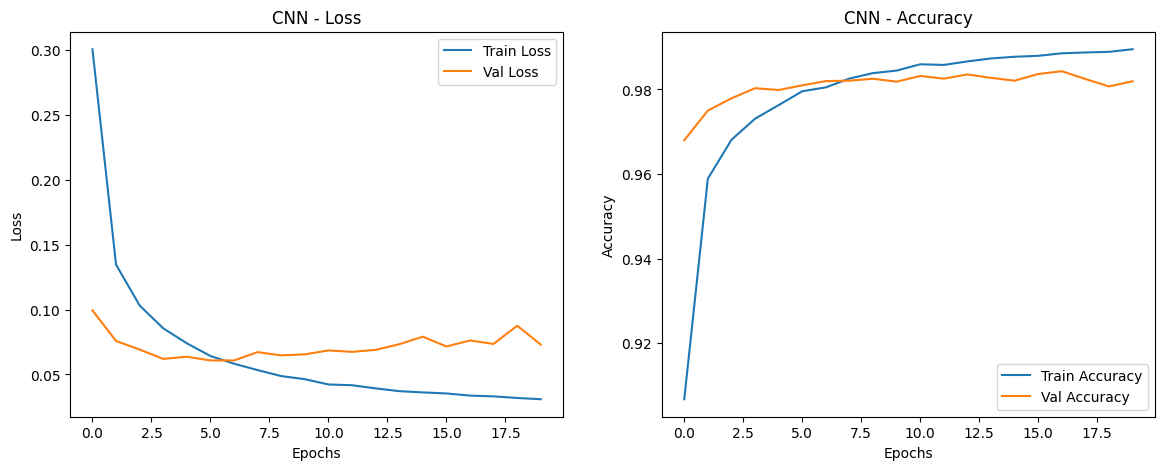

In [21]:
plot_model_history(cnn_history_big, 'CNN')
#plot_model_history(mlp_history_big, 'MLP')

In [10]:
## Modelo simple

# Construcción del modelo
simple_model = Sequential()

# Capa de entrada y capa oculta
simple_model.add(Flatten(input_shape=(28, 28, 3)))
simple_model.add(Dense(128, activation='relu'))  # 128 unidades ocultas

# Capa de salida
simple_model.add(Dense(10, activation='softmax'))

# Compilación del modelo
simple_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#simple_history = simple_model.fit(X_train_small, y_train_small, validation_data=(X_test_small, y_test_small), epochs=10, batch_size=128, verbose=2)
simple_history = simple_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=2)


Epoch 1/10
2344/2344 - 6s - 3ms/step - accuracy: 0.7519 - loss: 0.7884 - val_accuracy: 0.7641 - val_loss: 0.7385
Epoch 2/10
2344/2344 - 6s - 2ms/step - accuracy: 0.7787 - loss: 0.6995 - val_accuracy: 0.7885 - val_loss: 0.6724
Epoch 3/10
2344/2344 - 6s - 2ms/step - accuracy: 0.7928 - loss: 0.6588 - val_accuracy: 0.7952 - val_loss: 0.6516
Epoch 4/10
2344/2344 - 7s - 3ms/step - accuracy: 0.7998 - loss: 0.6332 - val_accuracy: 0.8051 - val_loss: 0.6208
Epoch 5/10
2344/2344 - 7s - 3ms/step - accuracy: 0.8060 - loss: 0.6152 - val_accuracy: 0.7969 - val_loss: 0.6441
Epoch 6/10
2344/2344 - 7s - 3ms/step - accuracy: 0.8103 - loss: 0.5989 - val_accuracy: 0.8073 - val_loss: 0.6182
Epoch 7/10
2344/2344 - 7s - 3ms/step - accuracy: 0.8148 - loss: 0.5848 - val_accuracy: 0.8139 - val_loss: 0.5935
Epoch 8/10
2344/2344 - 8s - 3ms/step - accuracy: 0.8187 - loss: 0.5724 - val_accuracy: 0.8132 - val_loss: 0.5980
Epoch 9/10
2344/2344 - 8s - 3ms/step - accuracy: 0.8225 - loss: 0.5604 - val_accuracy: 0.8183 - 

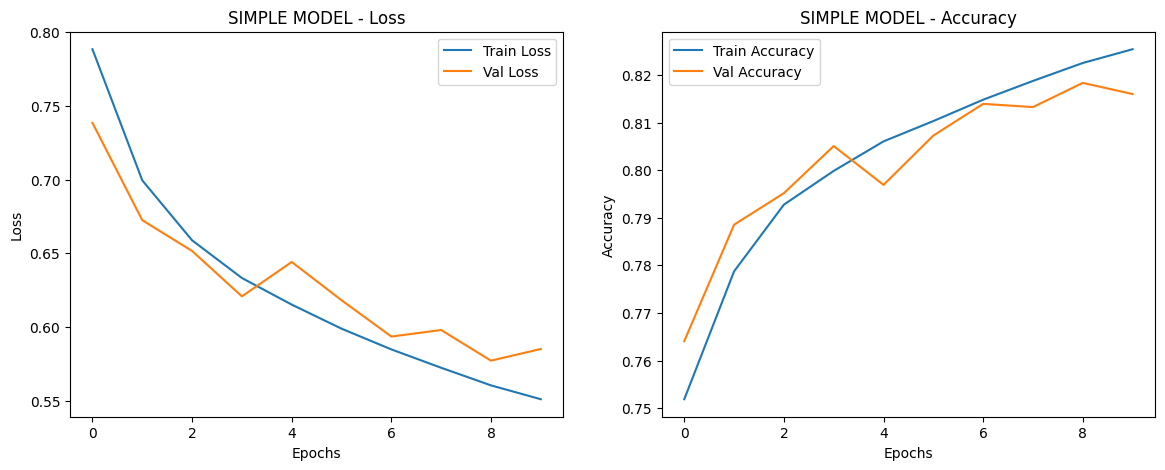

In [14]:
plot_model_history(simple_history, 'SIMPLE MODEL')


In [27]:
# Construcción del modelo
model_new1 = Sequential()

# Capa de entrada y primera capa oculta
model_new1.add(Flatten(input_shape=(28, 28, 3)))
model_new1.add(Dense(300, activation='relu'))

# Segunda capa oculta
model_new1.add(Dense(300, activation='relu'))

# Capa de salida
model_new1.add(Dense(10, activation='softmax'))

# Compilación del modelo
model_new1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [28]:
# Entrenamiento del modelo
history_new = model_new1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)



Epoch 1/20
2344/2344 - 15s - 6ms/step - accuracy: 0.7003 - loss: 0.9140 - val_accuracy: 0.7722 - val_loss: 0.6904
Epoch 2/20
2344/2344 - 15s - 6ms/step - accuracy: 0.8062 - loss: 0.6030 - val_accuracy: 0.8151 - val_loss: 0.5775
Epoch 3/20
2344/2344 - 16s - 7ms/step - accuracy: 0.8323 - loss: 0.5237 - val_accuracy: 0.8303 - val_loss: 0.5344
Epoch 4/20
2344/2344 - 19s - 8ms/step - accuracy: 0.8462 - loss: 0.4772 - val_accuracy: 0.8501 - val_loss: 0.4727
Epoch 5/20
2344/2344 - 19s - 8ms/step - accuracy: 0.8554 - loss: 0.4462 - val_accuracy: 0.8492 - val_loss: 0.4724
Epoch 6/20
2344/2344 - 19s - 8ms/step - accuracy: 0.8637 - loss: 0.4213 - val_accuracy: 0.8556 - val_loss: 0.4617
Epoch 7/20
2344/2344 - 19s - 8ms/step - accuracy: 0.8706 - loss: 0.3982 - val_accuracy: 0.8531 - val_loss: 0.4622
Epoch 8/20
2344/2344 - 21s - 9ms/step - accuracy: 0.8752 - loss: 0.3837 - val_accuracy: 0.8671 - val_loss: 0.4273
Epoch 9/20
2344/2344 - 20s - 8ms/step - accuracy: 0.8811 - loss: 0.3651 - val_accuracy: 

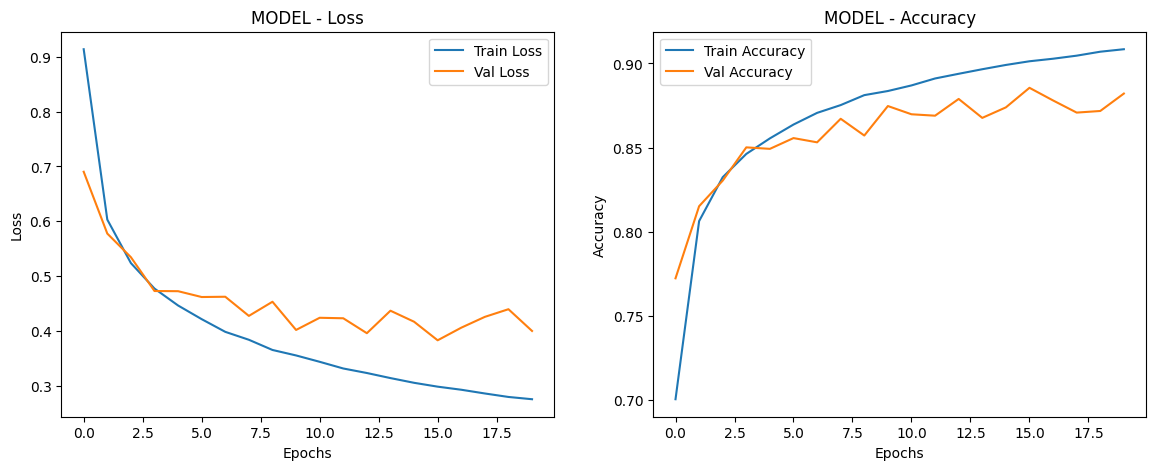

In [29]:
plot_model_history(history_new, 'MODEL')


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración de ImageDataGenerator con aumentación de imágenes
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotar imágenes hasta 10 grados
    width_shift_range=0.1,  # Desplazamiento horizontal hasta un 10%
    height_shift_range=0.1, # Desplazamiento vertical hasta un 10%
    shear_range=0.1,        # Aplicar transformación de corte
    zoom_range=0.1,         # Zoom dentro del rango del 10%
    horizontal_flip=True,   # Espejado horizontal
    fill_mode='nearest'     # Modo de relleno para píxeles vacíos
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(X_train)


In [24]:
best_history = (model_new).fit(datagen.flow(X_train, y_train, batch_size=32),
                 epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
  12/9375 ━━━━━━━━━━━━━━━━━━━━ 1:28 9ms/step - accuracy: 0.3617 - loss: 2.5822   

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 111s 12ms/step - accuracy: 0.4859 - loss: 1.5077 - val_accuracy: 0.7268 - val_loss: 0.8287
Epoch 2/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 114s 12ms/step - accuracy: 0.6043 - loss: 1.1754 - val_accuracy: 0.7276 - val_loss: 0.8126
Epoch 3/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 133s 14ms/step - accuracy: 0.6284 - loss: 1.1059 - val_accuracy: 0.7550 - val_loss: 0.7358
Epoch 4/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 160s 17ms/step - accuracy: 0.6460 - loss: 1.0558 - val_accuracy: 0.7443 - val_loss: 0.7704
Epoch 5/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 119s 13ms/step - accuracy: 0.6550 - loss: 1.0294 - val_accuracy: 0.7515 - val_loss: 0.7513
Epoch 6/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 160s 17ms/step - accuracy: 0.6659 - loss: 1.0010 - val_accuracy: 0.7585 - val_loss: 0.7184
Epoch 7/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 110s 12ms/step - accuracy: 0.6726 - loss: 0.9796 - val_accuracy: 0.7581 - val_loss: 0.7215
Epoch 8/15
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 122s 13ms/step - accuracy: 0.6778 - lo

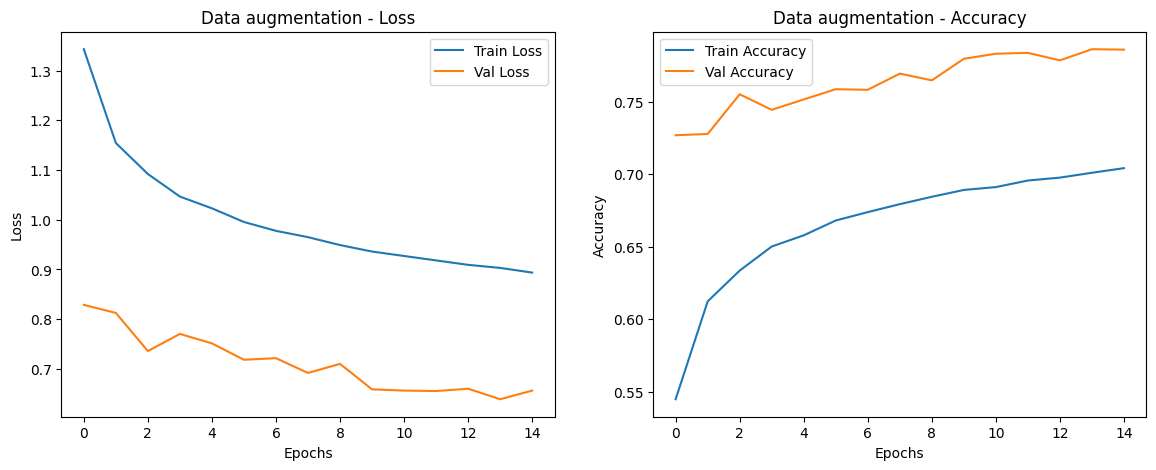

In [25]:
plot_model_history(best_history, 'Data augmentation')


### Parte 7

In [40]:
import os
import numpy as np
from PIL import Image

def load_test_images(folder, target_size=(28, 28)):
    my_Images = []
    my_Labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            try:
                # Cargar la imagen
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                
                # Asegurarse de que la imagen esté en modo RGB
                img = img.convert('RGB')
                
                # Redimensionar la imagen
                img = img.resize(target_size, Image.LANCZOS)
                
                # Convertir a array y normalizar
                img_array = np.array(img) / 255.0
                
                # Extraer la etiqueta del nombre del archivo
                label = int(filename.split('.')[0])  # Por ejemplo: 8.png -> 8
                
                my_Images.append(img_array)
                my_Labels.append(label)
            except Exception as e:
                print(f"Error al cargar {filename}: {e}")
    
    # Convertir a arrays NumPy
    my_Images = np.array(my_Images)
    my_Labels = np.array(my_Labels)
    
    return my_Images, my_Labels

# Ruta a la carpeta de imágenes de prueba
test_dir = "imgs"

# Cargar las imágenes de prueba
my_Images, my_Labels = load_test_images(test_dir)

# Imprimir información sobre los datos cargados
print("Forma de my_Images:", my_Images.shape)
print("Forma de my_Labels:", my_Labels.shape)
print("Etiquetas únicas:", np.unique(my_Labels))
print("Rango de valores en my_Images:", my_Images.min(), "-", my_Images.max())

Forma de my_Images: (10, 28, 28, 3)
Forma de my_Labels: (10,)
Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]
Rango de valores en my_Images: 0.23137254901960785 - 0.8666666666666667


In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # If the model outputs probabilities, convert to class predictions
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return y_pred, accuracy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Accuracy: 0.4000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         1
           9       0.00      0.00      0.00         1

    accuracy                           0.40        10
   macro avg       0.26      0.40      0.29        10
weighted avg       0.26      0.40      0.29        10



C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

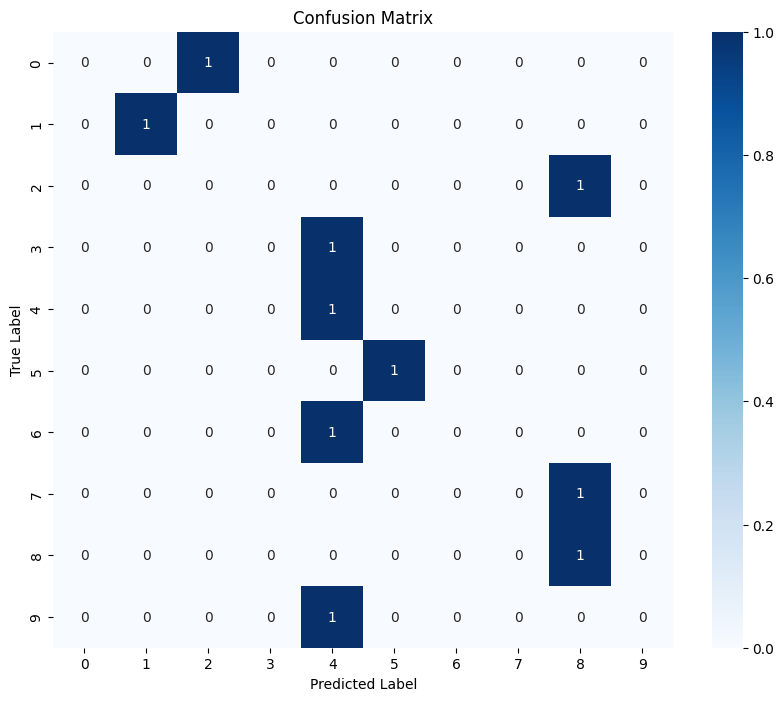

In [41]:

y_pred, accuracy = predict_and_evaluate(model_new1, my_Images, my_Labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy: 0.2000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.04      0.20      0.07        10
weighted avg       0.04      0.20      0.07        10



C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

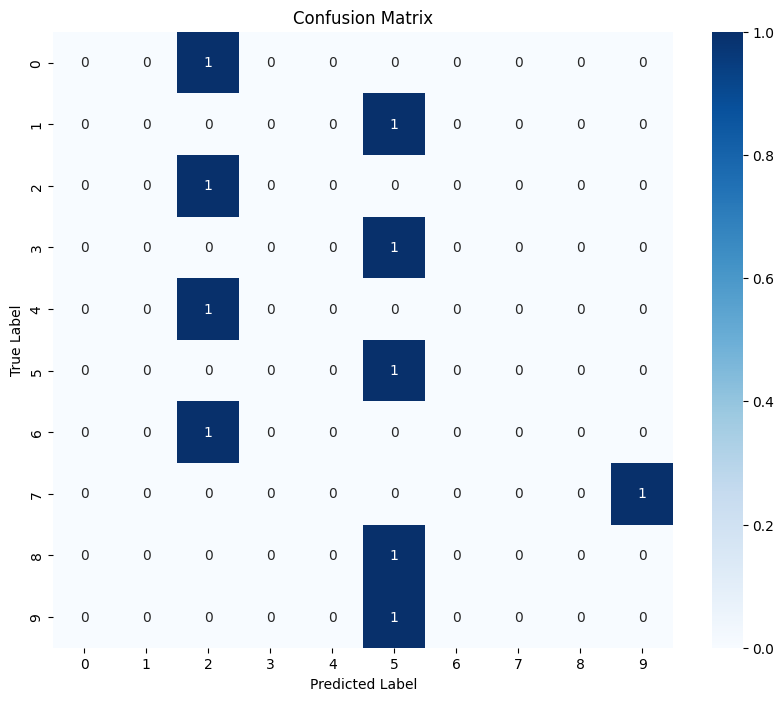

In [46]:
y_pred, accuracy = predict_and_evaluate(model_new, my_Images, my_Labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy: 0.6000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.25      1.00      0.40         1

    accuracy                           0.60        10
   macro avg       0.53      0.60      0.54        10
weighted avg       0.53      0.60      0.54        10



C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

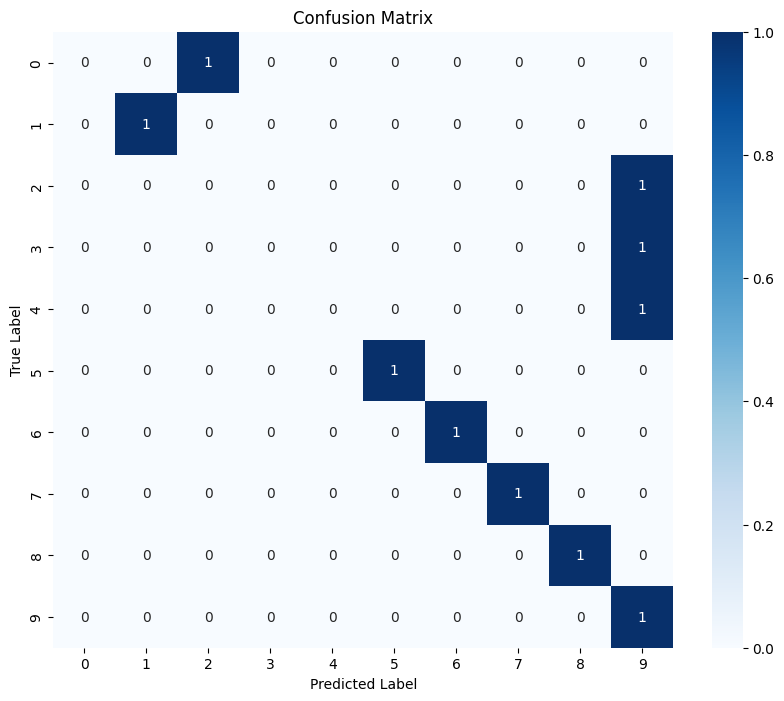

In [45]:
y_pred, accuracy = predict_and_evaluate(cnn_model, my_Images, my_Labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Accuracy: 0.3000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         1
           9       0.50      1.00      0.67         1

    accuracy                           0.30        10
   macro avg       0.12      0.30      0.17        10
weighted avg       0.12      0.30      0.17        10



C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

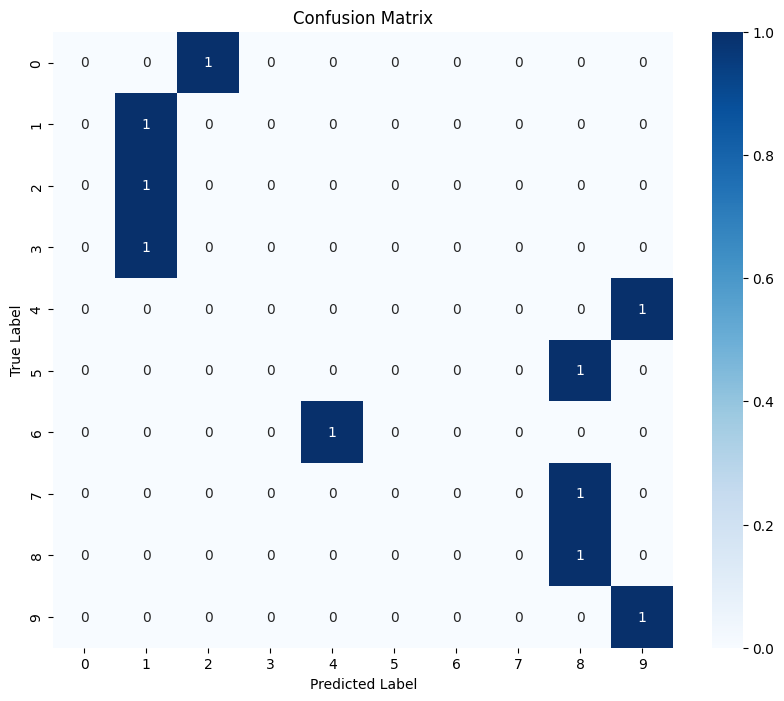

In [49]:
y_pred, accuracy = predict_and_evaluate(mlp_model, my_Images, my_Labels)